In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import re

from bs4 import BeautifulSoup
import requests
import os
import json

from sklearn.model_selection import train_test_split
import sklearn.model_selection

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.model_selection
from scipy import stats

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.datasets import load_breast_cancer

import prepare as prep
import explore as ex

In [2]:
#df = pd.read_csv('almost_there.csv', index_col=0)

In [3]:
#df = df.reset_index()

In [4]:
#df.nunique()

In [5]:
#df['title'].value_counts()

In [6]:
#df = df.drop_duplicates(subset='title')

In [7]:
#df

In [8]:
#df = df.drop(columns='book_tag')

In [9]:
#def get_data():
#    '''
#    Will pull the current data from the 'almost_there' csv file, and prep it for deeper cleaning.
#    '''
#    df = pd.read_csv('almost_there.csv', index_col=0)
#    df = df.drop_duplicates(subset='title')
    
#    save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']
#    sub = df[df['length'].isna()]
#    sub1 = sub[sub['title'].isin(save)]
#    df = df.dropna(subset='length')
#    df = pd.concat([df, sub1], axis=0)
    
#    df = df.dropna(subset='summary')
#    df = df.dropna(subset='year_published')
    
#    df = df.reset_index()
#    df = df.drop(columns=['index', 'book_tag'])
    
#    df['summary'] = df['summary'].astype('string')
#    df['title'] = df['title'].astype('string')
#    df['author'] = df['author'].astype('string')
#    df['genre'] = df['genre'].astype('string')
#    df['length'] = df['length'].astype('float')

#    return df

In [10]:
df = prep.get_data('all_books.csv')

In [11]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[]
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[]
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[]
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[]
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[]
...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[]
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[]
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN


In [12]:
df.isna().sum()

title                   0
summary                 0
year_published          0
author                  0
review_count            0
number_of_ratings       0
length                  0
genre                   0
rating                  0
reviews              2050
dtype: int64

In [13]:
df.dtypes

title                 object
summary               object
year_published        object
author                object
review_count           int64
number_of_ratings      int64
length               float64
genre                 object
rating               float64
reviews               object
dtype: object

In [14]:
#df = df.dropna(subset='summary')

In [15]:
#df[df['year_published'].isna()]

In [16]:
#df = df.dropna(subset='year_published')

In [17]:
prep.clean_article(df, 'title')

In [18]:
prep.clean_article(df, 'summary')

In [19]:
df.dtypes

title                 object
summary               object
year_published        object
author                object
review_count           int64
number_of_ratings      int64
length               float64
genre                 object
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
dtype: object

In [20]:
#df = df.drop(columns='clean_titles')

In [21]:
df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)

In [22]:
prep.clean_article(df1, 'Book')

In [23]:
ser = df1['cleaned_Book']

In [24]:
prep.creat_tar(df, ser)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False


In [25]:
#save = ['Eleven on Top', 'Winter of the World', 'Nothing to Lose', 'Reflected in You']

In [26]:
#sub = df[df['length'].isna()]

In [27]:
#sub1 = sub[sub['title'].isin(save)]

In [28]:
#df = df.dropna(subset='length')

In [29]:
#df = pd.concat([df, sub1], axis=0)

In [30]:
df.dtypes

title                 object
summary               object
year_published        object
author                object
review_count           int64
number_of_ratings      int64
length               float64
genre                 object
rating               float64
reviews               object
cleaned_title         object
cleaned_summary       object
successful              bool
dtype: object

In [31]:
df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)

In [32]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False,time adolf hitler attempt take western world a...
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False,enchant sequel number one bestseller five peop...
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False,one war hero search oldest language ancient ar...
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False,unsolved murder farm family still haunt white ...


In [33]:
df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)

In [79]:
df.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...,0.185,0.804,0.011,-0.9534,very negative
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...,0.019,0.875,0.106,0.9388,very positive
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811,very positive
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...,0.068,0.679,0.253,0.9861,very positive
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779,negative


In [35]:
df['sentiment'] = df['compound'].apply(prep.get_sentiment)

In [36]:
df

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,Missing in Death,"Aboard the Staten Island ferry, a tourist come...",2009,J.D. Robb,334,9875,77.0,Mystery,4.24,[],missing in death,"aboard the staten island ferry, a tourist come...",False,aboard staten island ferry tourist come across...,0.185,0.804,0.011,-0.9534,very negative
1,The Last Boyfriend,"Owen is the organizer of the Montgomery clan, ...",2012,Nora Roberts,2545,47392,436.0,Romance,4.09,[],the last boyfriend,"owen is the organizer of the montgomery clan, ...",False,owen organizer montgomery clan run family cons...,0.019,0.875,0.106,0.9388,very positive
2,Just Me in the Tub,Taking a bath is a big job. Mercer Mayer's fam...,1994,Gina Mayer,62,19212,24.0,Childrens,4.25,[],just me in the tub,taking a bath is a big job. mercer mayer's fam...,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811,very positive
3,Lucy in the Sky,Settling down for a 24-hour flight to Australi...,2007,Paige Toon,628,9524,390.0,Chick Lit,3.95,[],lucy in the sky,settling down for a 24hour flight to australia...,False,settle flight australia lucy find text message...,0.068,0.679,0.253,0.9861,very positive
4,The Rats in the Walls,"""The Rats in the Walls"" is a short story by H....",1924,H.P. Lovecraft,531,9155,25.0,Horror,4.01,[],the rats in the walls,the rats in the walls is a short story by h.p....,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,"The Monuments Men: Allied Heroes, Nazi Thieves...",At the same time Adolf Hitler was attempting t...,2009,Robert M. Edsel,3922,49232,473.0,History,3.79,[],"the monuments men allied heroes, nazi thieves,...",at the same time adolf hitler was attempting t...,False,time adolf hitler attempt take western world a...,0.090,0.767,0.143,0.7597,very positive
3851,The Next Person You Meet in Heaven,In this enchanting sequel to the number one be...,2018,Mitch Albom,4477,45566,218.0,Fiction,4.31,[],the next person you meet in heaven,in this enchanting sequel to the number one be...,False,enchant sequel number one bestseller five peop...,0.070,0.772,0.158,0.9706,very positive
3852,The Oldest Dance,As one of the war heroes searches the oldest l...,2021,Misba,885,4643,245.0,Fantasy,4.48,NaN,the oldest dance,as one of the war heroes searches the oldest l...,False,one war hero search oldest language ancient ar...,0.079,0.801,0.120,0.8831,very positive
3853,The Plague of Doves,The unsolved murder of a farm family still hau...,2008,Louise Erdrich,2239,16284,314.0,Fiction,3.80,NaN,the plague of doves,the unsolved murder of a farm family still hau...,False,unsolved murder farm family still haunt white ...,0.140,0.743,0.117,-0.4939,negative


# exploration

In [ ]:
#def prep_data(filename):
    
#    df = prep.get_data(filename)
    
#    prep.clean_article(df, 'title')
#    prep.clean_article(df, 'summary')
    
#    df1 = pd.read_csv('books_feat_on_NYBS', index_col=0)
#    prep.clean_article(df1, 'Book')
#    ser = df1['cleaned_Book']
    
#    prep.creat_tar(df, ser)
    
#    df.loc[[3806], ['length']] = 320
#    df.loc[[3807], ['length']] = 407
#    df.loc[[3808], ['length']] = 368
#    df.loc[[3809], ['length']] = 920
    
#    df['lemmatized_summary'] = df['cleaned_summary'].apply(prep.lemmatize_text)
#    df[['neg', 'neutral', 'pos', 'compound']] = df['summary'].apply(prep.feat_sent)
#    df['sentiment'] = df['compound'].apply(prep.get_sentiment)
    
#    return df
    

In [ ]:
df = prep.prep_data('all_books.csv')

In [ ]:
df

In [ ]:
# genre_counts = df['genre'].value_counts()

In [ ]:
# df['genre'].value_counts()

In [ ]:
# genre_counts

In [ ]:
# df['target'].value_counts()

In [ ]:
# genres_to_remove = genre_counts[genre_counts < 8].index
# remove the rows with those genres "filtering"
# df = df[~df['genre'].isin(genres_to_remove)]

In [ ]:
#df.loc[[3806], ['length']] = 320

In [ ]:
#df.loc[[3807], ['length']] = 407

In [ ]:
#df.loc[[3808], ['length']] = 368

In [ ]:
#df.loc[[3809], ['length']] = 920

In [ ]:
#df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [ ]:
#df['successful'] = df['successful'].astype(bool)

In [ ]:
df.isna().sum()

In [39]:
def split(df):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['successful'])
    return train, test

In [40]:
train, test = split(df)

In [77]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
411,Skipping Christmas,Imagine a year without Christmas. No crowded s...,2001,John Grisham,6146,70678,198.0,Fiction,3.53,NaN,skipping christmas,imagine a year without christmas. no crowded s...,True,imagine year without christmas crowd shop corn...,0.139,0.777,0.083,-0.8008,very negative
497,A Long Obedience in the Same Direction: Discip...,"As a society, we are no less obsessed with the...",1980,Eugene H. Peterson,722,8474,212.0,Christian,4.26,[],a long obedience in the same direction discipl...,"as a society, we are no less obsessed with the...",False,society le obsessed immediate eugene peterson ...,0.016,0.828,0.155,0.9795,very positive
2872,Taste Berries for Teens #4,A return to the award-winning Taste Berries fo...,2004,Bettie B. Youngs,1,15,424.0,books-rated-5-stars,3.60,NaN,taste berries for teens 4,a return to the awardwinning taste berries for...,False,return awardwinning taste berry teens formula ...,0.057,0.728,0.216,0.9819,very positive
123,Exotic Neurotic,SYNOPSIS Exotic Neurotic is a book of poetry w...,2016,Kenneth Jarrett Singleton,11,2442,108.0,Poetry,3.68,NaN,exotic neurotic,synopsis exotic neurotic is a book of poetry w...,False,synopsis exotic neurotic poetry involve subjec...,0.305,0.613,0.081,-0.9393,very negative
1058,The Accidental Time Machine,"Joe Haldeman ""has quietly become one of the mo...",2007,Joe Haldeman,906,9265,278.0,Science Fiction,3.71,NaN,the accidental time machine,joe haldeman has quietly become one of the mos...,False,joe haldeman quietly become one important scie...,0.020,0.912,0.067,0.5648,very positive


In [42]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [ ]:
for col in train.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [43]:
train.dtypes

title                  object
summary                object
year_published         object
author                 object
review_count            int64
number_of_ratings       int64
length                float64
genre                  object
rating                float64
reviews                object
cleaned_title          object
cleaned_summary        object
successful               bool
lemmatized_summary     object
neg                   float64
neutral               float64
pos                   float64
compound              float64
sentiment              object
dtype: object

In [44]:
genre_counts = df['genre'].value_counts()

In [45]:
genres = genre_counts.head(13)

In [46]:
train.head()

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
411,Skipping Christmas,Imagine a year without Christmas. No crowded s...,2001,John Grisham,6146,70678,198.0,Fiction,3.53,NaN,skipping christmas,imagine a year without christmas. no crowded s...,True,imagine year without christmas crowd shop corn...,0.139,0.777,0.083,-0.8008,very negative
497,A Long Obedience in the Same Direction: Discip...,"As a society, we are no less obsessed with the...",1980,Eugene H. Peterson,722,8474,212.0,Christian,4.26,[],a long obedience in the same direction discipl...,"as a society, we are no less obsessed with the...",False,society le obsessed immediate eugene peterson ...,0.016,0.828,0.155,0.9795,very positive
2872,Taste Berries for Teens #4,A return to the award-winning Taste Berries fo...,2004,Bettie B. Youngs,1,15,424.0,books-rated-5-stars,3.60,NaN,taste berries for teens 4,a return to the awardwinning taste berries for...,False,return awardwinning taste berry teens formula ...,0.057,0.728,0.216,0.9819,very positive
123,Exotic Neurotic,SYNOPSIS Exotic Neurotic is a book of poetry w...,2016,Kenneth Jarrett Singleton,11,2442,108.0,Poetry,3.68,NaN,exotic neurotic,synopsis exotic neurotic is a book of poetry w...,False,synopsis exotic neurotic poetry involve subjec...,0.305,0.613,0.081,-0.9393,very negative
1058,The Accidental Time Machine,"Joe Haldeman ""has quietly become one of the mo...",2007,Joe Haldeman,906,9265,278.0,Science Fiction,3.71,NaN,the accidental time machine,joe haldeman has quietly become one of the mos...,False,joe haldeman quietly become one important scie...,0.020,0.912,0.067,0.5648,very positive


In [47]:
df.dtypes

title                  object
summary                object
year_published         object
author                 object
review_count            int64
number_of_ratings       int64
length                float64
genre                  object
rating                float64
reviews                object
cleaned_title          object
cleaned_summary        object
successful               bool
lemmatized_summary     object
neg                   float64
neutral               float64
pos                   float64
compound              float64
sentiment              object
dtype: object

In [56]:
unsuccessful = train[train['successful'] == False]
successful = train[train['successful'] == True]

In [59]:
successful['length'].min(), successful['length'].mean(), successful['length'].max()

(196.0, 472.0234375, 1237.0)

In [60]:
unsuccessful['length'].min(), unsuccessful['length'].mean(), unsuccessful['length'].max()

(12.0, 349.180649526387, 4211.0)

In [48]:
# Rotating X-axis labels
# plt.xticks(rotation = 25)

In [81]:
def pearsonr_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform a pearsonr test on them and print out 
    the test statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    corr, p = stats.pearsonr(group1, group2)

    alpha = .05
    seed = 42

    print(f'Correlation = {corr:.4f}') 
    print(f'p-value     = {p}')

    print('Is p-value < alpha?', p < alpha)

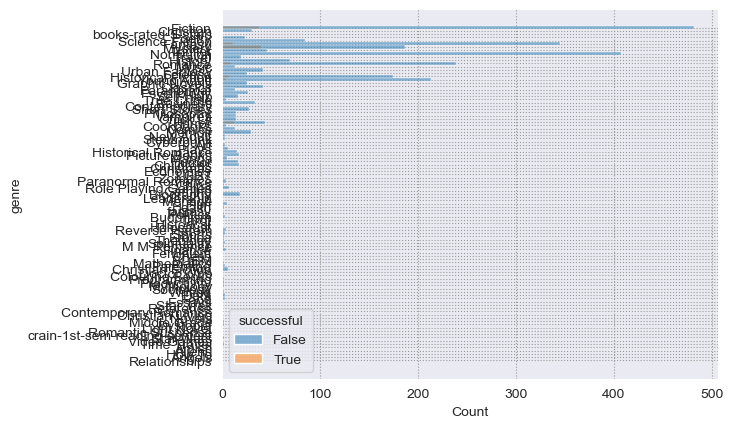

In [49]:
sns.histplot(data=train, y='genre', hue='successful')
#plt.xticks(rotation = 80)
plt.show()

In [50]:
#plt.barplot

<AxesSubplot:xlabel='compound', ylabel='sentiment'>

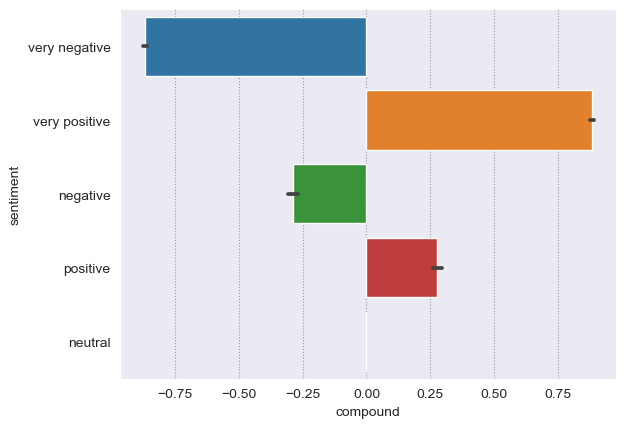

In [51]:
sns.barplot(x = 'compound',y= 'sentiment', data = train)

In [61]:
top_authors = train['author'].value_counts().head(10).index.tolist()

top_authors

['J.D. Robb',
 'Stephen King',
 'Louise Penny',
 'Kelley Armstrong',
 'Charlaine Harris',
 'Cora Reilly',
 'Terry Pratchett',
 'Rick Riordan',
 'Cassandra Clare',
 'Bill Bryson']

In [62]:
filtered_df = train[train['author'].isin(top_authors)]

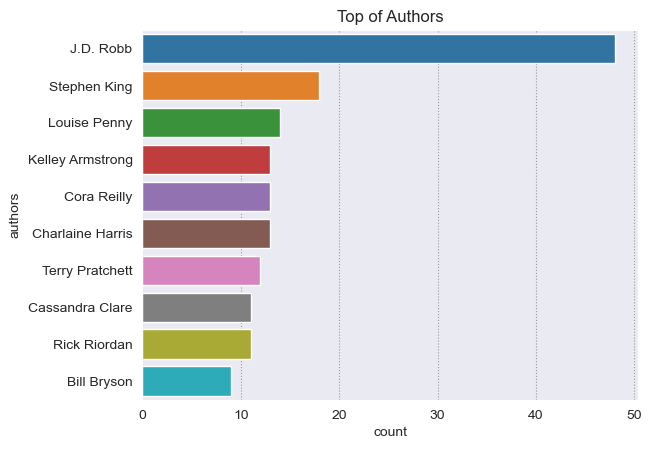

In [63]:
# Construct plot
sns.countplot(y='author', data=filtered_df, order=filtered_df['author'].value_counts().index)

plt.title('Top of Authors')
plt.ylabel('Appearances on List')
plt.ylabel('authors')
plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

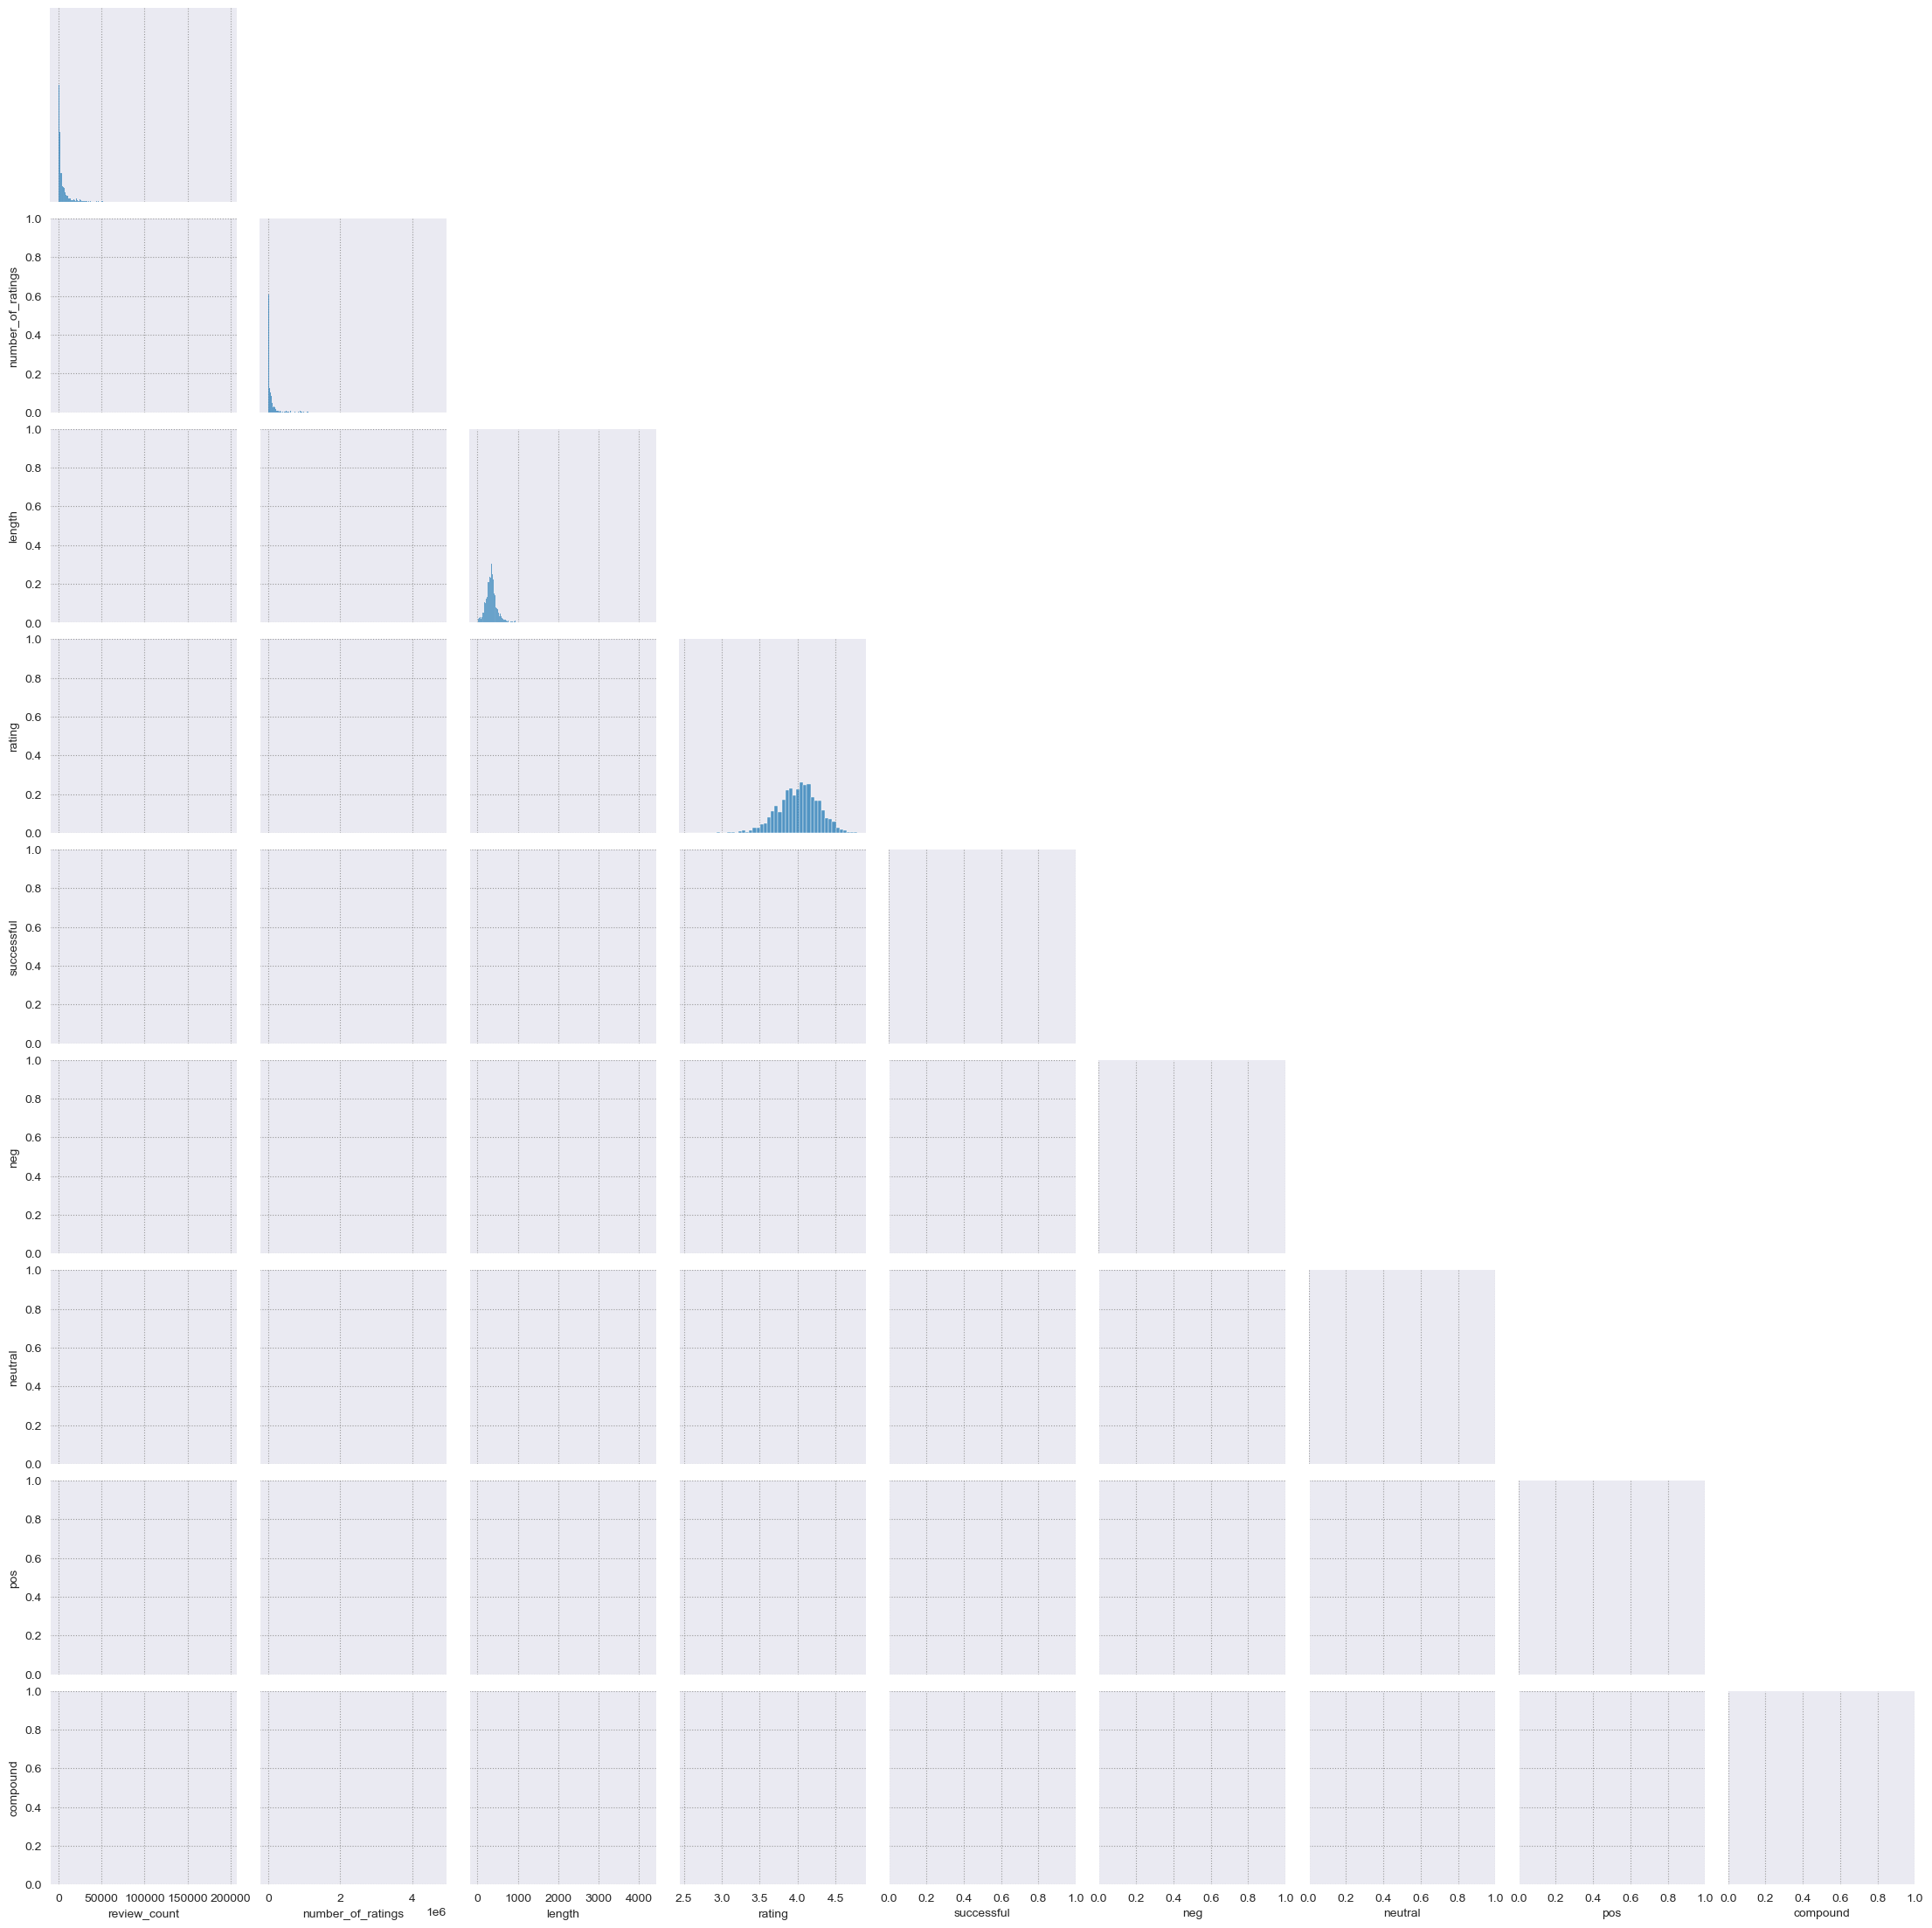

In [65]:
sns.pairplot(data=train, corner=True)

## What is the relationship between summary sentiment score and book length, between sentiment score and year_published ?

In [67]:
train.head(1)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
411,Skipping Christmas,Imagine a year without Christmas. No crowded s...,2001,John Grisham,6146,70678,198.0,Fiction,3.53,NaN,skipping christmas,imagine a year without christmas. no crowded s...,True,imagine year without christmas crowd shop corn...,0.139,0.777,0.083,-0.8008,very negative


In [71]:
train[['compound', 'length']]

,compound,length
411,-0.8008,198.0
497,0.9795,212.0
2872,0.9819,424.0
123,-0.9393,108.0
1058,0.5648,278.0
...,...,...
1834,-0.9830,336.0
1039,0.4404,276.0
3019,0.6187,445.0
795,-0.8658,256.0


In [86]:
def sent_vs_len(train):

    sns.scatterplot(data=train, x='length', y='compound', hue='successful')

    plt.title('Comparing Book Length to the Compound Sentiment Score')
    plt.xlabel('Book Length')
    plt.ylabel('Sentiment Score')
    plt.show()

In [82]:
pearsonr_report(train['compound'], train['length'])

Correlation = -0.1286
p-value     = 7.715209151566854e-13
Is p-value < alpha? True


## testing cross validation

In [ ]:
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

In [ ]:
y

In [ ]:
# with kfold

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))